In [1]:
import os
os.environ['KAGGLE_USERNAME']="manpris"
os.environ['KAGGLE_KEY'] = "b5349248cec5857a447acbe50f036aa4"


In [2]:
#Geramny dataset
!kaggle datasets download -d ander289386/cars-germany
!unzip cars-germany.zip

#India dataset
!kaggle datasets download -d manishkr1754/cardekho-used-car-data
!unzip cardekho-used-car-data.zip

#Pakistan dataset
!kaggle datasets download -d ebrahimhaquebhatti/75000-used-cars-dataset-with-specifications
!unzip 75000-used-cars-dataset-with-specifications.zip

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 79.3MB/s]
Archive:  cars-germany.zip
  inflating: autoscout24-germany-dataset.csv  
  0% 0.00/230k [00:00<?, ?B/s]
100% 230k/230k [00:00<00:00, 106MB/s]
Archive:  cardekho-used-car-data.zip
  inflating: cardekho_dataset.csv    
  0% 0.00/1.21M [00:00<?, ?B/s]
100% 1.21M/1.21M [00:00<00:00, 118MB/s]
Archive:  75000-used-cars-dataset-with-specifications.zip
  inflating: PakWheelsDataSet.csv    


#Three country datasets - Searching Common Car Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings


warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
!pip install category_encoders
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [54]:
cars_G = pd.read_csv('/content/autoscout24-germany-dataset.csv')
cars_I = pd.read_csv('cardekho_dataset.csv')
cars_P = pd.read_csv('/content/PakWheelsDataSet.csv')

In [ ]:
cars_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [ ]:
cars_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
cars_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76690 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76690 non-null  int64  
 1   Make                 76690 non-null  object 
 2   Name                 76690 non-null  object 
 3   Transmission         76690 non-null  object 
 4   Engine Type          76690 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76690 non-null  int64  
 7   City                 76690 non-null  object 
 8   Year                 76690 non-null  int64  
 9   Price                76690 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


Country wise View of Top 5 Popular Car Models

In [6]:
from tabulate import tabulate

cars_G.rename(columns={'make': 'brand'}, inplace=True)
cars_P.rename(columns={'Name': 'model', 'Make': 'brand'}, inplace=True)


# Create a function to generate and print tables for a given DataFrame
def print_table(dataframe, title):
    #unique_models = dataframe.groupby(['model', 'brand']).size().reset_index(name='count').sort_values(by='count', ascending=False)
    unique_models = dataframe.groupby(['brand']).size().reset_index(name='count').sort_values(by='count', ascending=False)
    tabular_output = tabulate(unique_models.head(5), headers='keys', tablefmt='grid', showindex=False)
    print(f"Top 5 Used Cars in : {title}")
    print(tabular_output)
    print("\n")


# Assuming you have DataFrames cars_I, cars_P, and cars_G
# Print tables for each DataFrame

print_table(cars_I, "India")
print_table(cars_P, "Pakistan")
print_table(cars_G, "Germany")

print( "Total Indian Used Cars = ", len(cars_I['model']),"\n")
print( "Total Pakistani Used Cars =", len(cars_P['model']),"\n")
print("Total German Used Cars =",len(cars_G['model']),"\n" )



Top 5 Used Cars in : India
+----------+---------+
| brand    |   count |
+==========+=========+
| Maruti   |    4992 |
+----------+---------+
| Hyundai  |    2982 |
+----------+---------+
| Honda    |    1485 |
+----------+---------+
| Mahindra |    1011 |
+----------+---------+
| Toyota   |     793 |
+----------+---------+


Top 5 Used Cars in : Pakistan
+----------+---------+
| brand    |   count |
+==========+=========+
| Toyota   |   29585 |
+----------+---------+
| Honda    |   17440 |
+----------+---------+
| Suzuki   |   16998 |
+----------+---------+
| Daihatsu |    2695 |
+----------+---------+
| Nissan   |    1467 |
+----------+---------+


Top 5 Used Cars in : Germany
+------------+---------+
| brand      |   count |
+============+=========+
| Volkswagen |    6931 |
+------------+---------+
| Opel       |    4814 |
+------------+---------+
| Ford       |    4442 |
+------------+---------+
| Skoda      |    2889 |
+------------+---------+
| Renault    |    2830 |
+-----------

In [ ]:
# For Germany

#usedcars_clean.groupby(['make'])['make'].count().sort_values(ascending=False)
from tabulate import tabulate

# Group by 'model' and 'make' to get unique combinations
unique_models = cars_G.groupby(['model', 'make']).size().reset_index(name='count')

# Convert the grouped DataFrame to a tabular format
tabular_output = tabulate(unique_models, headers='keys', tablefmt='grid')

# Print the tabular output
print(tabular_output)

In [ ]:
# For India

#usedcars_clean.groupby(['make'])['make'].count().sort_values(ascending=False)
from tabulate import tabulate

# Group by 'model' and 'make' to get unique combinations
unique_models = cars_I.groupby(['model', 'brand']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Convert the grouped DataFrame to a tabular format
tabular_output = tabulate(unique_models, headers='keys', tablefmt='grid', showindex=False)

# Print the tabular output
print(tabular_output)
print("Total car models =", len(cars_I['model']))

+--------------+---------------+---------+
| model        | brand         |   count |
+==============+===============+=========+
| i20          | Hyundai       |     906 |
+--------------+---------------+---------+
| Swift Dzire  | Maruti        |     890 |
+--------------+---------------+---------+
| Swift        | Maruti        |     781 |
+--------------+---------------+---------+
| Alto         | Maruti        |     778 |
+--------------+---------------+---------+
| City         | Honda         |     757 |
+--------------+---------------+---------+
| Wagon R      | Maruti        |     717 |
+--------------+---------------+---------+
| Grand        | Hyundai       |     580 |
+--------------+---------------+---------+
| Innova       | Toyota        |     545 |
+--------------+---------------+---------+
| Verna        | Hyundai       |     492 |
+--------------+---------------+---------+
| i10          | Hyundai       |     410 |
+--------------+---------------+---------+
| Ecosport 

In [ ]:
# For Pakistan

#usedcars_clean.groupby(['make'])['make'].count().sort_values(ascending=False)
from tabulate import tabulate

# Group by 'model' and 'make' to get unique combinations
unique_models = cars_P.groupby(['Name', 'Make']).size().reset_index(name='count')

# Convert the grouped DataFrame to a tabular format
tabular_output = tabulate(unique_models, headers='keys', tablefmt='grid')

# Print the tabular output
print(tabular_output)

+------+-------------------------------------------+------------+---------+
|      | Name                                      | Make       |   count |
+======+===========================================+============+=========+
|    0 | 1 Series   116i                           | BMW        |       1 |
+------+-------------------------------------------+------------+---------+
|    1 | 1 Series   118i                           | BMW        |       1 |
+------+-------------------------------------------+------------+---------+
|    2 | 120 Y                                     | Datsun     |       2 |
+------+-------------------------------------------+------------+---------+
|    3 | 120 Y                                     | Nissan     |       1 |
+------+-------------------------------------------+------------+---------+
|    4 | 120 Y   Y 1.2                             | Datsun     |       1 |
+------+-------------------------------------------+------------+---------+
|    5 | 120

# Age of Car distribution

In [55]:
#  transform 'year' to 'age' column
from datetime import datetime

cars_G['age'] = datetime.now().year - cars_G['year']
cars_G.drop('year', axis=1, inplace=True)

cars_P['age'] = datetime.now().year - cars_P['Year']
cars_P.drop('Year', axis=1, inplace=True)

cars_I.rename(columns={'vehicle_age': 'age'}, inplace=True)

In [ ]:
print(cars_I['age'].describe(),cars_P['age'].describe(),cars_G['age'].describe())


count   15411.00
mean        6.04
std         3.01
min         0.00
25%         4.00
50%         6.00
75%         8.00
max        29.00
Name: age, dtype: float64 count   76690.00
mean       11.00
std         7.37
min         2.00
25%         5.00
50%         9.00
75%        16.00
max        83.00
Name: age, dtype: float64 count   46405.00
mean        6.99
std         3.16
min         2.00
25%         4.00
50%         7.00
75%        10.00
max        12.00
Name: age, dtype: float64


In [ ]:
# Calculate age counts for each dataframe
age_countsG = cars_G['age'].value_counts().sort_index()
age_countsP = cars_P['age'].value_counts().sort_index()
age_countsI = cars_I['age'].value_counts().sort_index()
print (age_countsG,age_countsP, age_countsI)

2     4181
3     4286
4     4233
5     4223
6     4223
7     4266
8     4214
9     4180
10    4266
11    4221
12    4112
Name: age, dtype: int64 2     6868
3     2254
4     3515
5     6893
6     5796
      ... 
71       4
72       2
73       1
81       1
83       1
Name: age, Length: 68, dtype: int64 0        5
1      221
2     1145
3     1926
4     2252
5     2117
6     1924
7     1438
8     1282
9     1027
10     710
11     551
12     293
13     237
14     129
15      90
16      25
17      17
18      11
19       5
21       3
22       1
25       1
29       1
Name: age, dtype: int64


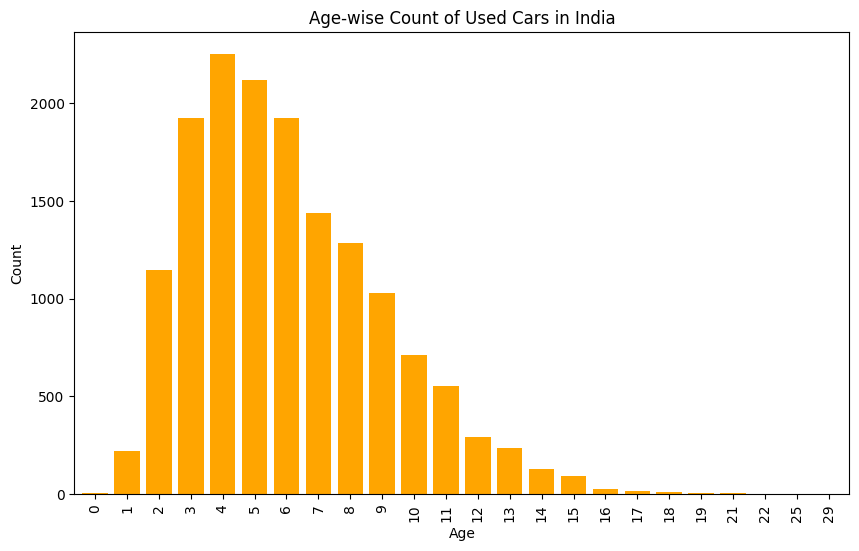

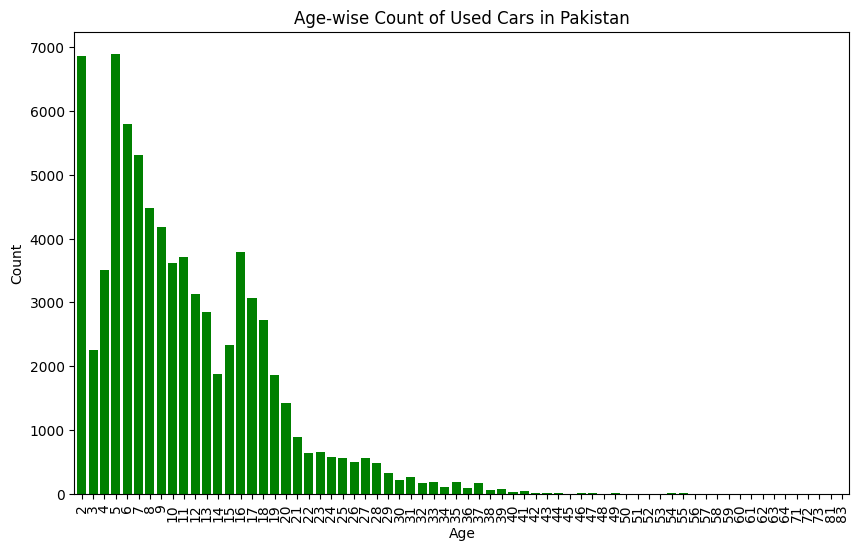

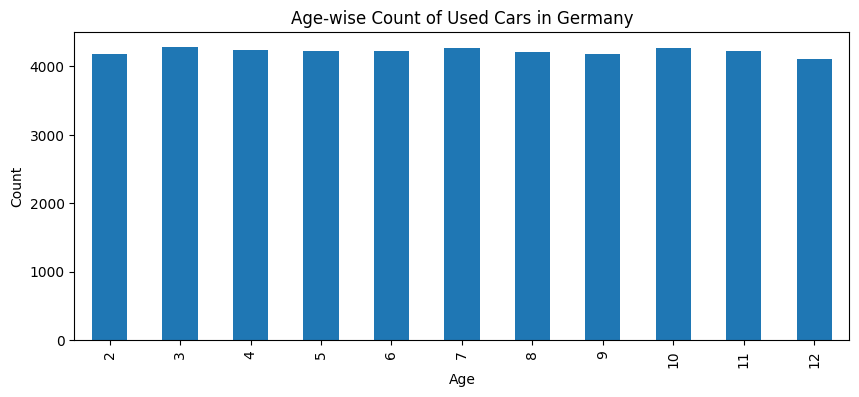

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated age_countsP as described earlier

# Create a bar chart to visualize the age-wise counts

#India
plt.figure(figsize=(10, 6))
age_countsI.plot(kind='bar', width=0.8, color='orange')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Count of Used Cars in India')

# Show the plot
plt.show()

# Pakistan
plt.figure(figsize=(10, 6))
age_countsP.plot(kind='bar', width=0.8, color='green')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Count of Used Cars in Pakistan')

# Show the plot
plt.show()

# Germany
plt.figure(figsize=(10, 4))
age_countsG.plot(kind='bar', width=0.5)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Count of Used Cars in Germany')

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

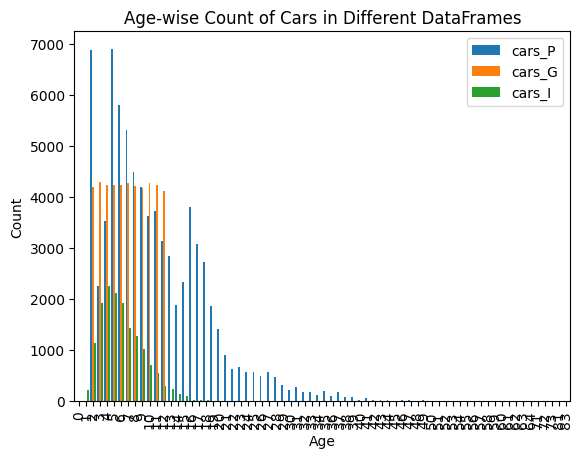

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming you have already calculated age_countsP, age_countsG, and age_countsI
# age_countsP represents counts for cars_P DataFrame, age_countsG for cars_G, and age_countsI for cars_I

# Create a DataFrame to store the age-wise counts from all three DataFrames
combined_counts_df = pd.DataFrame({
    'cars_P': age_countsP,
    'cars_G': age_countsG,
    'cars_I': age_countsI
})

# Create a bar chart to visualize the combined age-wise counts
plt.figure(figsize=(12, 8))
combined_counts_df.plot(kind='bar', width=0.8)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Count of Cars in Different DataFrames')

# Show the plot
plt.show()


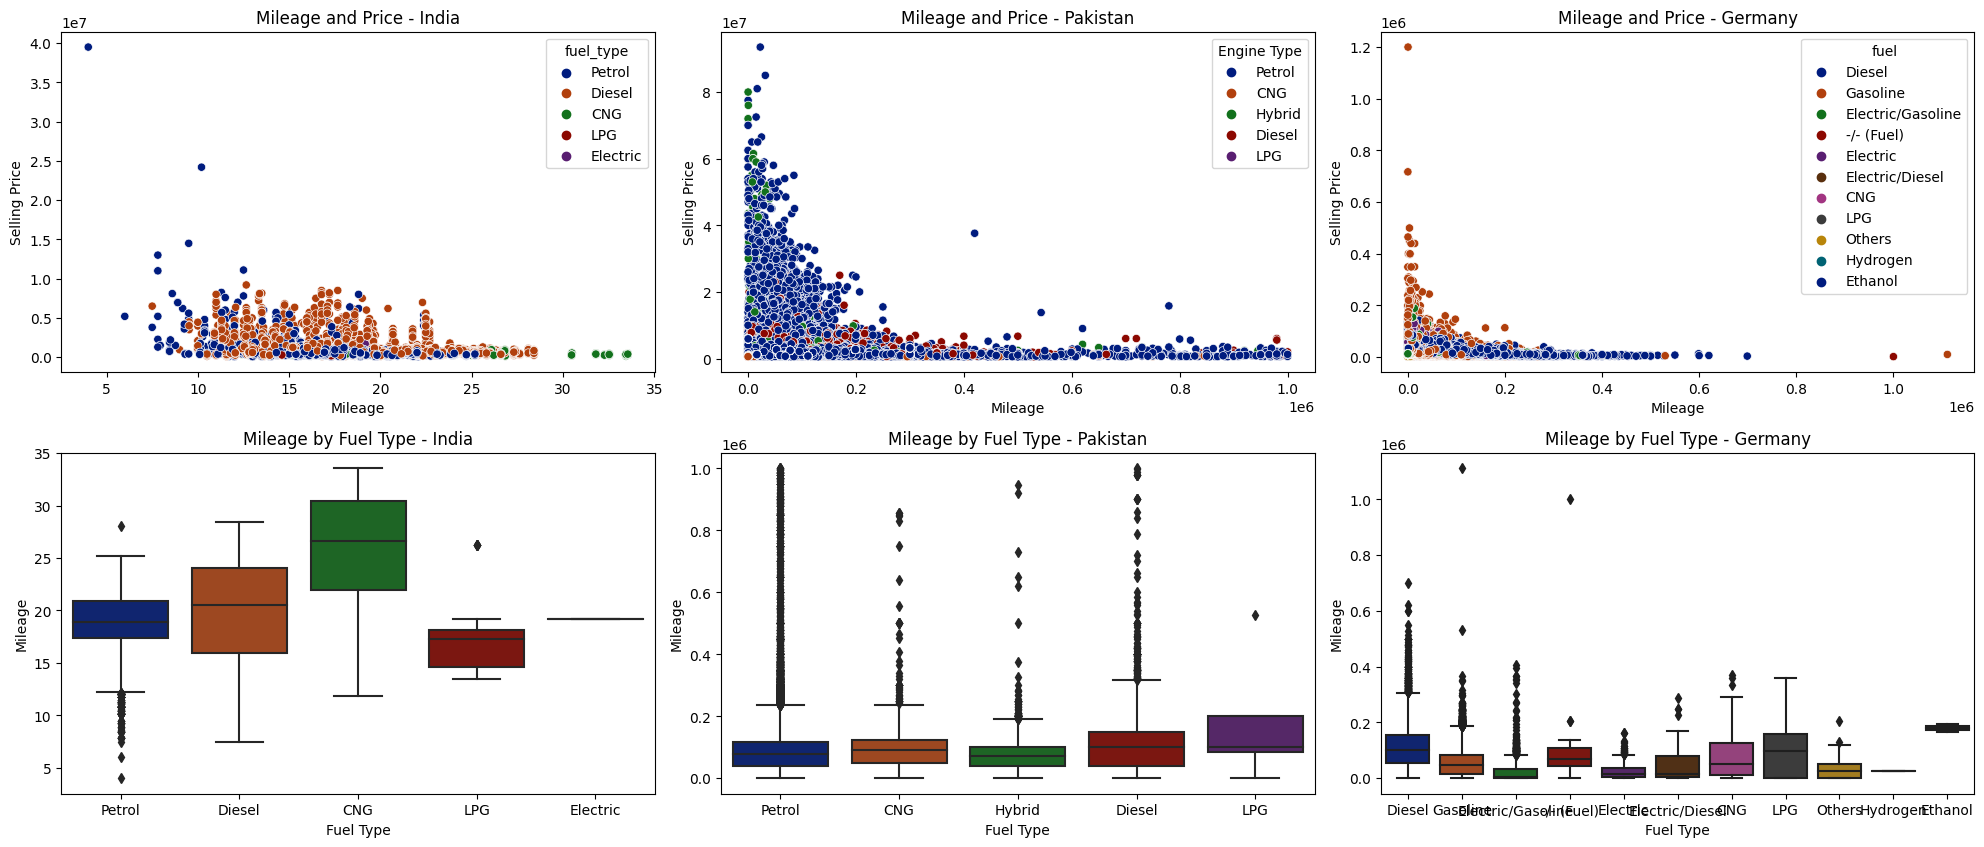

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))


# India
plt.subplot(6, 3, 1)
sns.scatterplot(data=cars_I, x='mileage', y='selling_price', hue='fuel_type', palette='dark')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Mileage and Price - India')

plt.subplot(6, 3, 4)
sns.boxplot(data=cars_I, x='fuel_type', y='mileage', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Mileage by Fuel Type - India')

#Pakistan
plt.subplot(6, 3, 2)
sns.scatterplot(data=cars_P, x='Mileage(kms)', y='Price', hue='Engine Type', palette='dark')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Mileage and Price - Pakistan')

plt.subplot(6, 3, 5)
sns.boxplot(data=cars_P, x='Engine Type', y='Mileage(kms)', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Mileage by Fuel Type - Pakistan')

#Germany
plt.subplot(6, 3, 3)
sns.scatterplot(data=cars_G, x='mileage', y='price', hue='fuel', palette='dark')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Mileage and Price - Germany')

plt.subplot(6, 3, 6)
sns.boxplot(data=cars_G, x='fuel', y='mileage', palette='dark')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Mileage by Fuel Type - Germany')

# display------
plt.tight_layout()
plt.show()

#HOW IS THE DISTRIBUTION OF ENGINE TYPES WITHIN THE DATASET

In [39]:
cars_I['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [40]:
cars_G['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [56]:
cars_P['Engine Type'].unique()

array(['Petrol', 'CNG', 'Hybrid', 'Diesel', 'LPG'], dtype=object)

In [57]:
# Regroup based on FUEL
#India
cars_I['fuel_type'] = cars_I['fuel_type'].str.lower()

cars_I.loc[cars_I['fuel_type'].str.contains('petrol', regex=True), 'fuel_type'] = 'Petrol'
cars_I.loc[cars_I['fuel_type'].str.contains('diesel', regex=True), 'fuel_type'] = 'Diesel'
cars_I.loc[cars_I['fuel_type'].str.contains('cng|lpg|electric', regex=True), 'fuel_type'] = 'Others'


#Pakistan
cars_P['Engine Type'] = cars_P['Engine Type'].str.lower()

cars_P.loc[cars_P['Engine Type'].str.contains('petrol', regex=True), 'Engine Type'] = 'Petrol'
cars_P.loc[cars_P['Engine Type'].str.contains('diesel', regex=True), 'Engine Type'] = 'Diesel'
cars_P.loc[cars_P['Engine Type'].str.contains('cng|lpg|hybrid', regex=True), 'Engine Type'] = 'Others'


#Germany
cars_G['fuel'] = cars_G['fuel'].str.lower()

cars_G.loc[cars_G['fuel'].str.contains('gasoline', regex=True), 'fuel'] = 'Petrol'
cars_G.loc[cars_G['fuel'].str.contains('diesel', regex=True), 'fuel'] = 'Diesel'
cars_G.loc[cars_G['fuel'].str.contains('cng|lpg|hydrogen|ethanol|electric/gasoline|electric|electric/diesel|others|fuel', regex=True), 'fuel'] = 'Others'


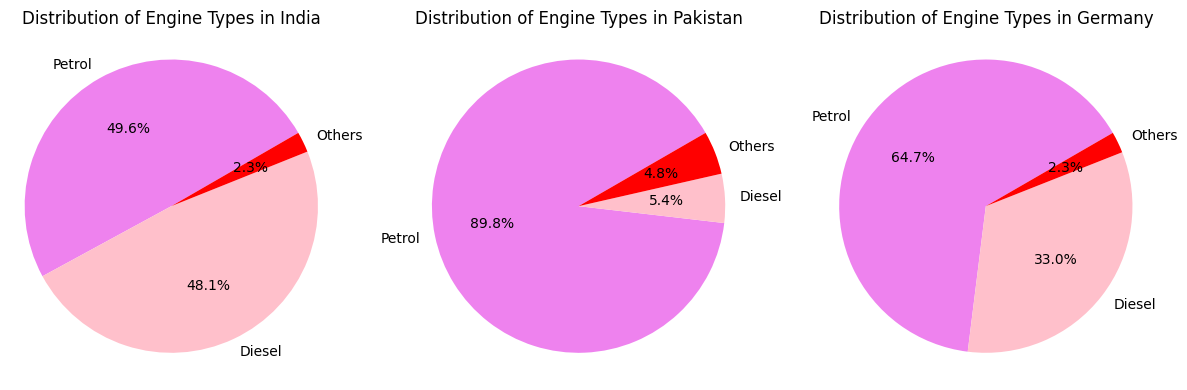

In [73]:
import matplotlib.pyplot as plt

# Sample data
engine_type_countsI = cars_I['fuel_type'].value_counts()
engine_type_countsP = cars_P['Engine Type'].value_counts()
engine_type_countsG = cars_G['fuel'].value_counts()

engine_type_labels = cars_I['fuel_type'].unique()

# Define a custom color palette
custom_colors = ['violet', 'pink', 'red']

# Create the pie chart for India
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.pie(engine_type_countsI, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types in India')

# Create the pie chart for Pakistan
plt.subplot(132)
plt.pie(engine_type_countsP, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types in Pakistan')

# Create the pie chart for Germany
plt.subplot(133)
plt.pie(engine_type_countsG, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types in Germany')

plt.tight_layout()
plt.show()


In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))

# Sample data
engine_type_countsI = cars_I['fuel_type'].value_counts()
engine_type_countsG = cars_G['fuel'].value_counts()
engine_type_countsP = cars_P['Engine Type'].value_counts()

engine_type_labels = cars_I['fuel_type'].unique()


#India
# Define a custom color palette
custom_colors = ['gold', 'lightcoral', 'purple']

# Create a pie chart with the custom color scheme
plt.subplot(100)
plt.pie(engine_type_countsI, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types')
plt.show()

#Pakistan
# Define a custom color palette
#custom_colorsP = ['lightgreen', 'yellow', 'lightcoral', 'red', 'black', 'purple']

# Create a pie chart with the custom color scheme
plt.subplot(200)
plt.pie(engine_type_countsP, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types')
plt.show()

#Germany
# Define a custom color palette
#custom_colorsG = ['red', 'yellow', 'lightcoral', 'darkgrey', 'purple', 'green']

# Create a pie chart with the custom color scheme
plt.subplot(300)
plt.pie(engine_type_countsG, labels=engine_type_labels, autopct='%1.1f%%', startangle=30, colors=custom_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Engine Types')
plt.show()

ValueError: ignored

<Figure size 400x500 with 0 Axes>

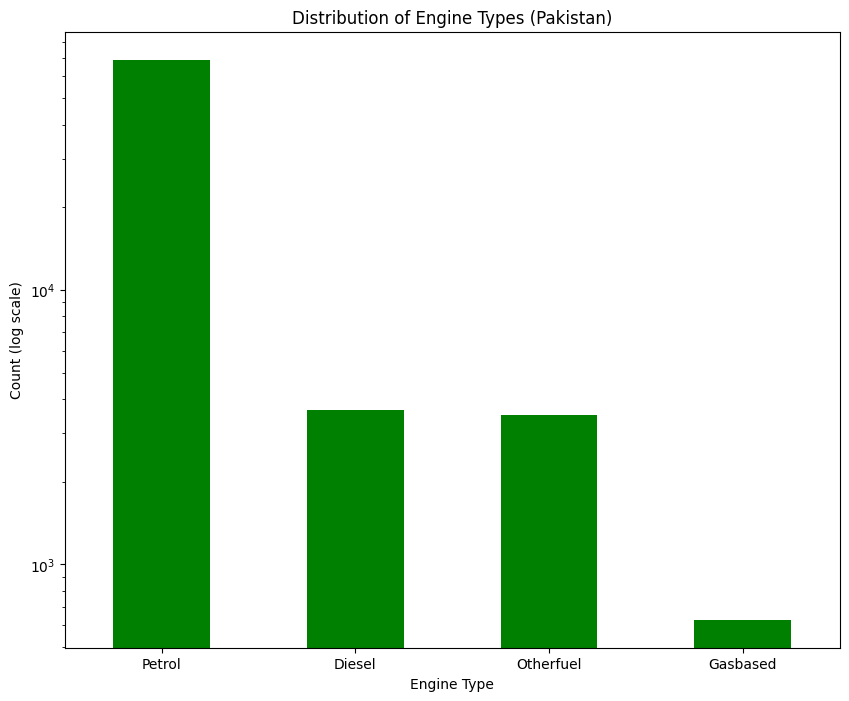

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


engine_distribution = cars_P['Engine Type'].value_counts()

plt.figure(figsize=(10, 8))
engine_distribution.plot(kind='bar',color='green')
plt.title('Distribution of Engine Types (Pakistan)')
plt.xlabel('Engine Type')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Distribution of Engine Types')

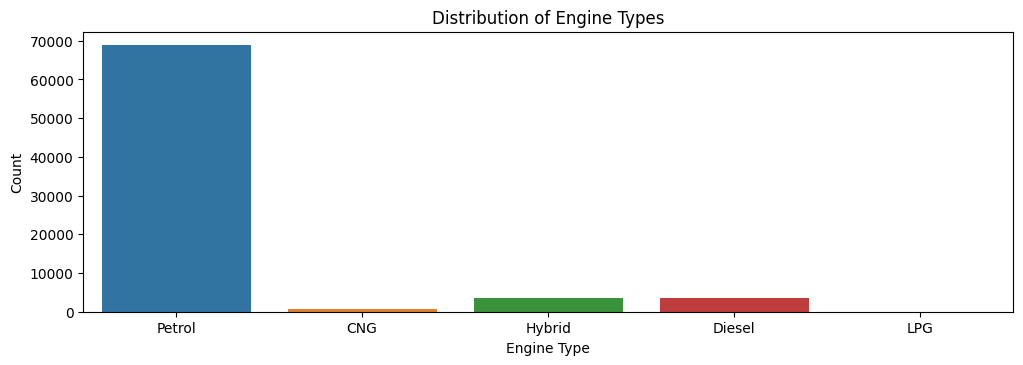

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Pakistan
# Create subplots for engine types and transmission types
plt.figure(figsize=(12, 8))

# Subplot for engine types distribution
plt.subplot(2, 1, 1)
sns.countplot(x='Engine Type', data=cars_P)
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Distribution of Engine Types')

##3 Most Feature Importance of XGB Model in the 3 datasets

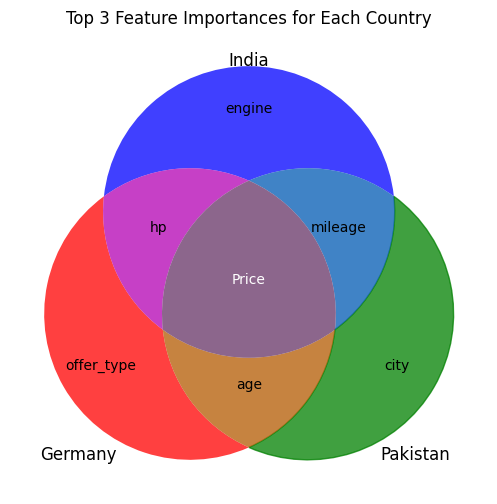

In [ ]:
from matplotlib import text
from matplotlib_venn import *
#Diagram

#countries = ['Germany', 'Pakistan', 'India']
#germany_features = ['age', 'hp', 'offer_type']
#pakistan_features = ['age', 'city', 'mileage']
#india_features = ['hp', 'engine', 'mileage']

plt.figure(figsize=(10, 6))

#from matplotlib_venn import venn2, venn3

#Making venn  diagram
# Venn Diagram with 2 groups
#venn2(subsets = (50, 10, 20), set_labels = ('A', 'B'),alpha=0.5)

# Venn Diagram with 3 groups
v=venn3(subsets={'100':1, '010':1, '110':1, '001':1, '101':1, '011':1, '111':1}, set_labels=('Germany', 'Pakistan', 'India'),alpha=0.75)

#v.get_patch_by_id('B').set_alpha(1.0)
v.get_patch_by_id('010').set_color('green')
v.get_label_by_id('100').set_text('offer_type')
v.get_label_by_id('010').set_text('city')
v.get_label_by_id('110').set_text('age')
v.get_label_by_id('001').set_text('engine')
v.get_label_by_id('101').set_text('hp')
v.get_label_by_id('011').set_text('mileage')
v.get_label_by_id('111').set_text('Price')
v.get_label_by_id('111').set_color('white')


plt.title('Top 3 Feature Importances for Each Country')
plt.gca().invert_yaxis()

plt.show()